<a href="https://colab.research.google.com/github/Rafirizanda/Durian-Variety-Classification-with-Efficientnet-B0-Architecture---Data-Science/blob/main/Best_Model_Efficientnet-B0_Durian_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
print(os.listdir('/content/drive/My Drive'))

['Colab Notebooks', 'Meong dot Club', 'File Foto HP Rafi 2025 May', 'durian_cnn', 'dataset_ex', 'Durian Training 2', 'Durian Validation 2', 'Durian Testing 2', 'Copy of 20250514_163227_001.jpg', 'Copy of 20250514_163227_004.jpg', 'Copy of 20250514_163227_007.jpg', 'Copy of 20250514_163227_002.jpg', 'Copy of 20250514_163227_003.jpg', 'Copy of 20250514_163227_008.jpg', 'Copy of 20250514_163227_005.jpg', 'Copy of 20250514_163227_010.jpg', 'Copy of 20250514_163227_014.jpg', 'Copy of 20250514_163227_012.jpg', 'Copy of 20250514_163227_006.jpg', 'Copy of 20250514_163227_009.jpg', 'Copy of 20250514_163227_015.jpg', 'Copy of 20250514_163227_011.jpg', 'Copy of 20250514_163227_013.jpg', 'Copy of 20250514_163227_019.jpg', 'Copy of 20250514_163227_017.jpg', 'Copy of 20250514_163227_021.jpg', 'Copy of 20250514_163227_016.jpg', 'Copy of 20250514_163227_022.jpg', 'Copy of 20250514_163227_020.jpg', 'Copy of 20250514_163227_018.jpg', 'Copy of 20250514_163206_005.jpg', 'Copy of 20250514_163206_007.jpg', 

In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf  # For tf.data
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.applications import EfficientNetB0


In [ ]:
# Parameter
dataset_path = "/content/drive/MyDrive/durian_split_7data"
IMG_SIZE = 224
BATCH_SIZE = 32

# Direktori
train_dir = f"{dataset_path}/train"
val_dir = f"{dataset_path}/val"
test_dir = f"{dataset_path}/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Parameter
dataset_path = "/content/drive/MyDrive/durian_split_7data"
IMG_SIZE = 224
BATCH_SIZE = 32

# Path ke masing-masing folder
train_dir = f"{dataset_path}/train"
val_dir = f"{dataset_path}/val"
test_dir = f"{dataset_path}/test"


# Augmentasi untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255
)

# Untuk validasi dan testing (tanpa augmentasi, hanya preprocessing)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Mendapatkan nama kelas dan jumlah kelas
class_names = list(train_generator.class_indices.keys())
NUM_CLASSES = len(class_names)

print("Class names:", class_names)
print("Number of classes:", NUM_CLASSES)


Found 980 images belonging to 7 classes.
Found 140 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Class names: ['bengkulu-durian', 'd24(sultan)-durian', 'goldenphoenix-durian', 'kota_agung-durian', 'medan-durian', 'musang_king-durian', 'sumatra_super-durian']
Number of classes: 7


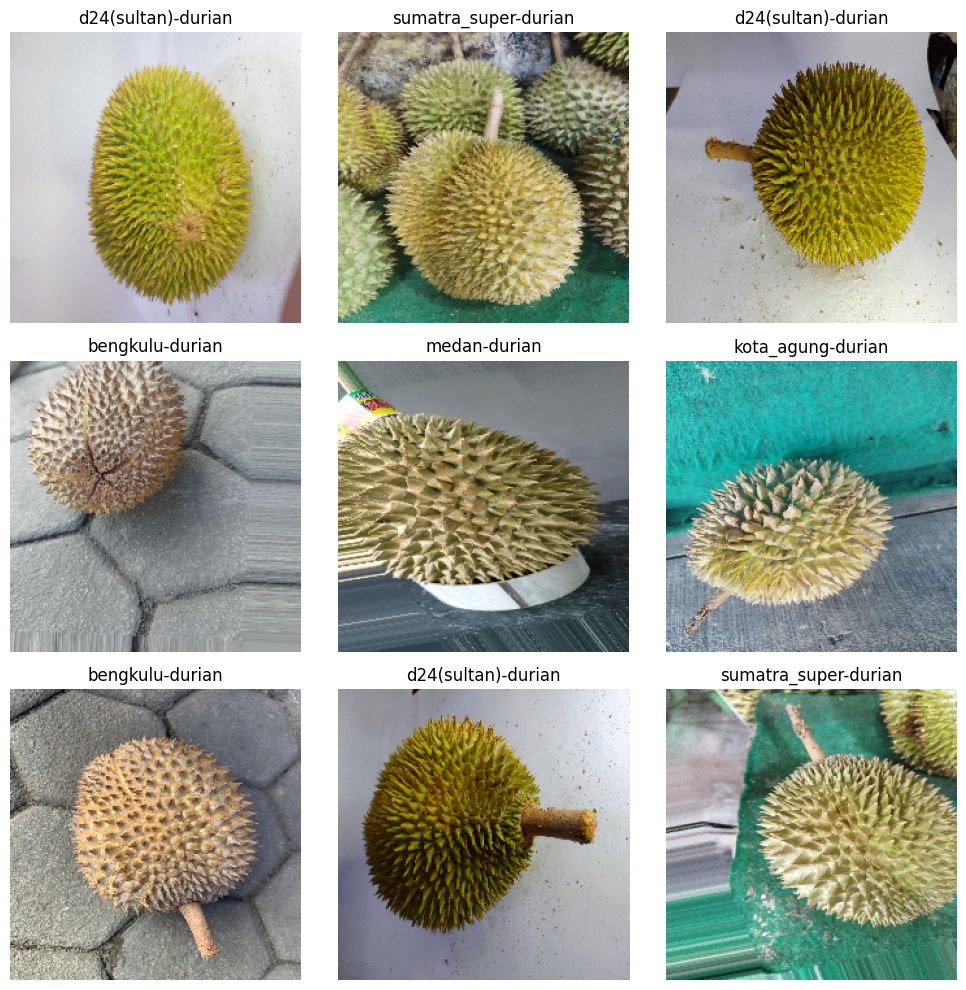

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari train_generator
image_batch, label_batch = next(train_generator)  # train_generator sudah didefinisikan sebelumnya

# Menampilkan hingga 9 gambar pertama di batch
plt.figure(figsize=(10, 10))

for i in range(min(9, image_batch.shape[0])):
    ax = plt.subplot(3, 3, i + 1)
    img = image_batch[i]

    # Konversi dari float ke uint8 jika diperlukan
    img_display = (img * 255).astype("uint8") if img.max() <= 1 else img.astype("uint8")

    # Tampilkan gambar
    plt.imshow(img_display)

    # Ambil index label (jika one-hot)
    label_index = np.argmax(label_batch[i])
    plt.title(class_names[label_index])  # class_names harus berupa list nama kelas

    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from keras.applications import EfficientNetB0

# Membuat Instance Model EfficientNetB0
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

base_model.trainable = False

base_model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(f"{i}: {layer.name} - {layer.__class__.__name__}")

0: input_layer - InputLayer
1: rescaling - Rescaling
2: normalization - Normalization
3: rescaling_1 - Rescaling
4: stem_conv_pad - ZeroPadding2D
5: stem_conv - Conv2D
6: stem_bn - BatchNormalization
7: stem_activation - Activation
8: block1a_dwconv - DepthwiseConv2D
9: block1a_bn - BatchNormalization
10: block1a_activation - Activation
11: block1a_se_squeeze - GlobalAveragePooling2D
12: block1a_se_reshape - Reshape
13: block1a_se_reduce - Conv2D
14: block1a_se_expand - Conv2D
15: block1a_se_excite - Multiply
16: block1a_project_conv - Conv2D
17: block1a_project_bn - BatchNormalization
18: block2a_expand_conv - Conv2D
19: block2a_expand_bn - BatchNormalization
20: block2a_expand_activation - Activation
21: block2a_dwconv_pad - ZeroPadding2D
22: block2a_dwconv - DepthwiseConv2D
23: block2a_bn - BatchNormalization
24: block2a_activation - Activation
25: block2a_se_squeeze - GlobalAveragePooling2D
26: block2a_se_reshape - Reshape
27: block2a_se_reduce - Conv2D
28: block2a_se_expand - Conv

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load pretrained EfficientNetB0 tanpa top layer
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Tahap awal: freeze seluruh base model

# Buat top classifier
input_layer = Input(shape=(224, 224, 3))
x = base_model(input_layer, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(7, activation='softmax', kernel_regularizer=l2(0.001))(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,442 (16.08 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# 🔄 Training model dengan timer
import time # Import the time module
# Gunakan preprocess_input yang cocok untuk EfficientNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

start_time = time.time()

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training top layer saja
history_top = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=20)  # Sesuaikan jumlah epoch awal

end_time = time.time()
total_time = end_time - start_time

# ⏱ Tampilkan waktu training
print(f"\nTotal training time: {total_time:.2f} seconds ({total_time / 60:.2f} minutes)\n")

Found 980 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 803s 26s/step - accuracy: 0.5813 - loss: 1.4250 - val_accuracy: 0.9286 - val_loss: 0.4448
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.9356 - loss: 0.4169 - val_accuracy: 0.9429 - val_loss: 0.3713
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.9535 - loss: 0.3575 - val_accuracy: 0.9857 - val_loss: 0.2789
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.9684 - loss: 0.2935 - val_accuracy: 0.9714 - val_loss: 0.2766
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.9859 - loss: 0.2463 - val_accuracy: 0.9857 - val_loss: 0.2432
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.9754 - loss: 0.2670 - val_accuracy: 0.9857 - val_loss: 0.2162
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.9873 - loss: 0.2114 - val_accuracy: 0.9929 - val_loss: 0.1971
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.9932 - loss: 0.1934 - val_accuracy: 0.9786 - 

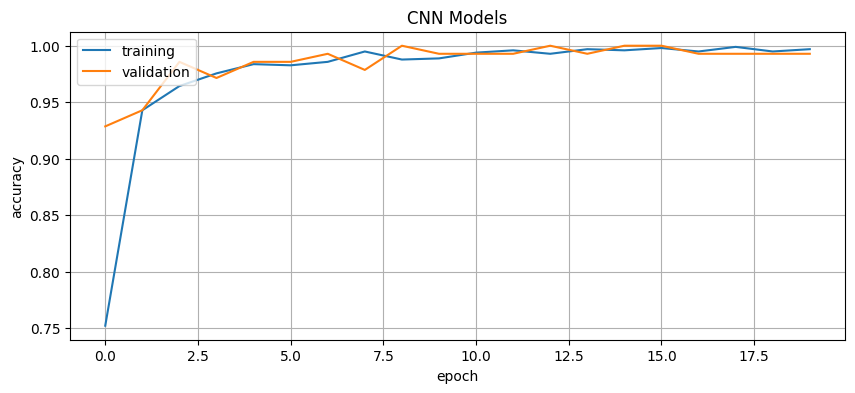

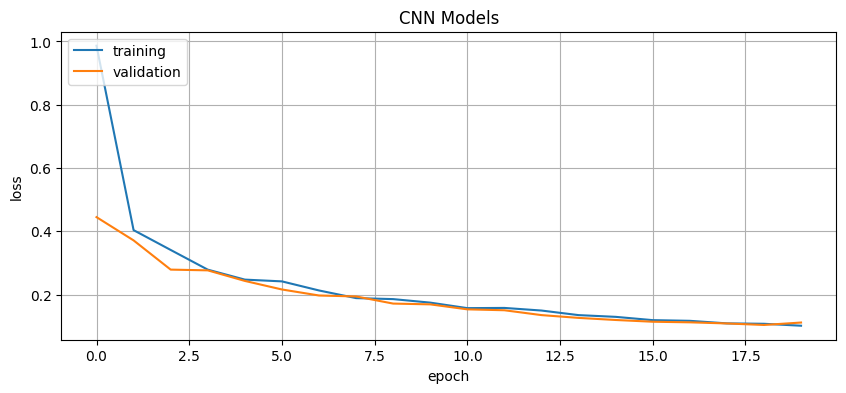

In [ ]:
import matplotlib.pyplot as plt

# Membuat Grafik Akurasi Model CNN
plt.figure(figsize=(10,4))
plt.plot(history_top.history['accuracy'])
plt.plot(history_top.history['val_accuracy'])
plt.title('CNN Models')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat Grafik Loss Model CNN
plt.figure(figsize=(10,4))
plt.plot(history_top.history['loss'])
plt.plot(history_top.history['val_loss'])
plt.title('CNN Models')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
model.save("20 epoch no augmentasi no fine tune no preprocess_input fine tuning 1 Black Thorn rmv (128_dense).keras")

In [ ]:
from google.colab import files
files.download("20 epoch no augmentasi no fine tune no preprocess_input fine tuning 1 Black Thorn rmv (128_dense).keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat model dari file H5
model = tf.keras.models.load_model('/content/drive/MyDrive/durian_split_7data/Model/20 epoch no augmentasi no fine tune no preprocess_input fine tuning 1 Black Thorn rmv (128_dense).keras')


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 280 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 181s 21s/step


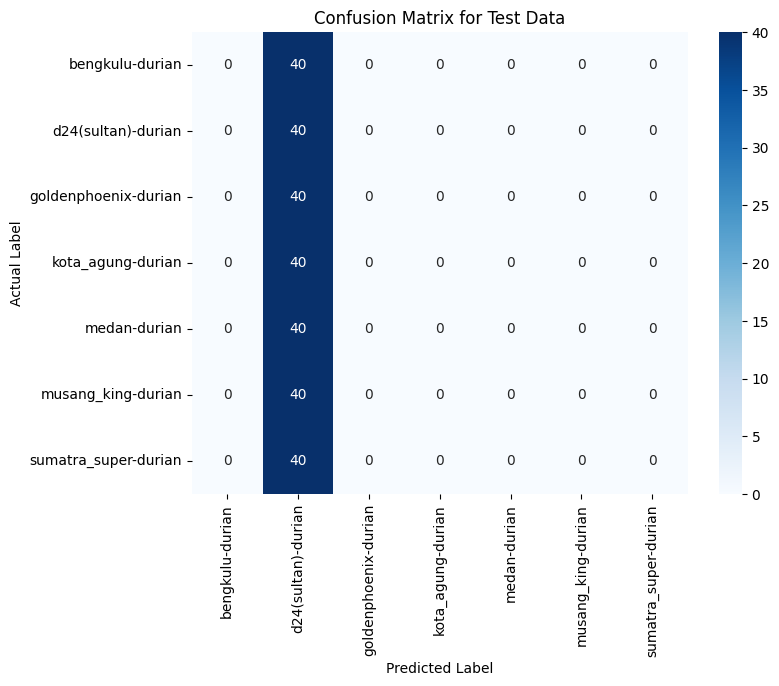

                      precision    recall  f1-score   support

     bengkulu-durian       0.00      0.00      0.00        40
  d24(sultan)-durian       0.14      1.00      0.25        40
goldenphoenix-durian       0.00      0.00      0.00        40
   kota_agung-durian       0.00      0.00      0.00        40
        medan-durian       0.00      0.00      0.00        40
  musang_king-durian       0.00      0.00      0.00        40
sumatra_super-durian       0.00      0.00      0.00        40

            accuracy                           0.14       280
           macro avg       0.02      0.14      0.04       280
        weighted avg       0.02      0.14      0.04       280



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Memprediksi label untuk data testing
test_generator.reset()
Y_test_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_test_pred = np.argmax(Y_test_pred, axis=1)
y_test_true = test_generator.classes

# Membuat confusion matrix untuk data testing
cm_test = confusion_matrix(y_test_true, y_test_pred)

# Visualisasi confusion matrix untuk data testing
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Test Data')
plt.show()

# Menampilkan classification report untuk data testing
print(classification_report(y_test_true, y_test_pred, target_names=test_generator.class_indices.keys()))

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Akurasi Data Uji: {test_acc:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9765 - loss: 0.1764
Akurasi Data Uji: 0.98
